# Python code for plotting root mean square fluctuation

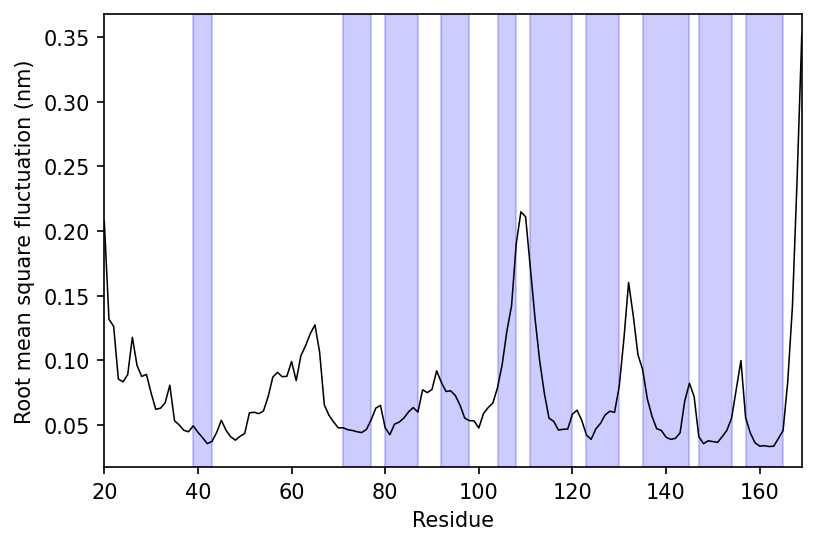

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x,y = np.loadtxt("rmsf_dehydration.xvg",comments=["@","#"],unpack=True)

plt.figure(dpi=150)
plt.plot(range(20,170),y,c="black",lw=0.75);
plt.xlabel("Residue")
plt.ylabel("Root mean square fluctuation (nm)")
plt.axvspan(39, 43, alpha=0.2, color='blue')
plt.axvspan(71, 77, alpha=0.2, color='blue')
plt.axvspan(80, 87, alpha=0.2, color='blue')
plt.axvspan(92, 98, alpha=0.2, color='blue')
plt.axvspan(104, 108, alpha=0.2, color='blue')
plt.axvspan(111, 120, alpha=0.2, color='blue')
plt.axvspan(123, 130, alpha=0.2, color='blue')
plt.axvspan(135, 145, alpha=0.2, color='blue')
plt.axvspan(147, 154, alpha=0.2, color='blue')
plt.axvspan(157, 165, alpha=0.2, color='blue')
plt.xlim((20,169));

# Python code to create index file

In [2]:
f = open("c_alphas.ndx")
content = f.readlines()
f.close()
atoms = []
for line in content[1:]:
    atoms += line.strip().split()
pairs = []
for atom in atoms:
    pairs.append(f"5 {atom}")
for line in pairs:
    print(line)

5 5
5 23
5 29
5 39
5 54
5 61
5 78
5 90
5 102
5 112
5 134
5 144
5 159
5 183
5 197
5 204
5 226
5 237
5 261
5 278
5 285
5 307
5 331
5 346
5 357
5 371
5 383
5 407
5 426
5 441
5 455
5 475
5 487
5 497
5 517
5 536
5 547
5 557
5 576
5 583
5 610
5 616
5 635
5 650
5 667
5 688
5 695
5 702
5 716
5 733
5 755
5 769
5 789
5 806
5 828
5 847
5 871
5 893
5 908
5 915
5 927
5 944
5 965
5 982
5 999
5 1016
5 1035
5 1046
5 1070
5 1076
5 1088
5 1110
5 1124
5 1145
5 1167
5 1181
5 1193
5 1209
5 1223
5 1243
5 1265
5 1284
5 1298
5 1313
5 1328
5 1335
5 1349
5 1363
5 1380
5 1397
5 1411
5 1425
5 1439
5 1454
5 1473
5 1495
5 1516
5 1538
5 1559
5 1573
5 1588
5 1600
5 1607
5 1614
5 1628
5 1647
5 1669
5 1679
5 1694
5 1710
5 1727
5 1751
5 1757
5 1768
5 1792
5 1806
5 1828
5 1844
5 1863
5 1880
5 1892
5 1907
5 1928
5 1950
5 1966
5 1980
5 1987
5 1999
5 2014
5 2033
5 2048
5 2070
5 2084
5 2105
5 2127
5 2143
5 2150
5 2162
5 2178
5 2192
5 2202
5 2224
5 2248
5 2272
5 2293
5 2315
5 2337
5 2348
5 2359
5 2370


# Python code to plot distance between Ala20 and other residues

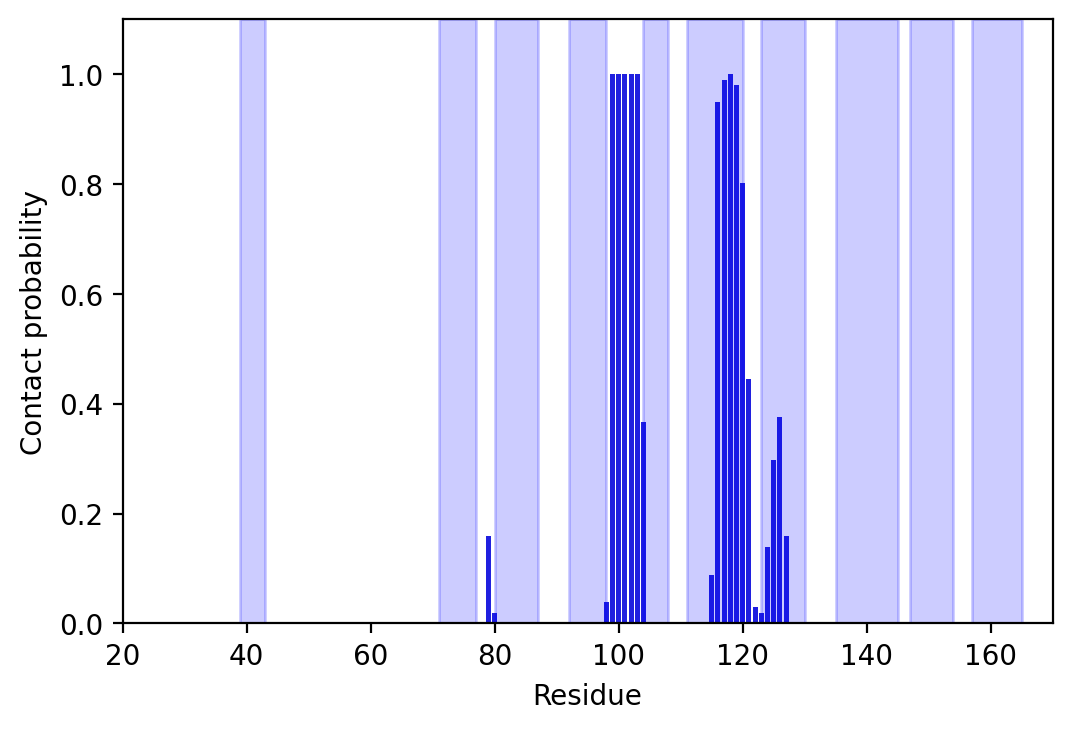

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.DataFrame(np.loadtxt("Ala20_distance_dehydration.xvg",comments=["@","#"],unpack=True).transpose())
df[0] = range(0,1050,10)
df = df.drop([21*i for i in range(1,5)],axis=0)
df = df.set_index(0)
df.columns = range(20,170)

threshold = df.describe().transpose()["min"].describe()["mean"] - df.describe().transpose()["min"].describe()["std"]
probabilities = []
for column in df.columns:
    if column < 31:
        probabilities.append(0)
    else:
        probabilities.append((df[df[column] < threshold].count()[column])/101)

plt.figure(dpi=200)
sns.barplot(x=df.columns,y=probabilities,color="blue")
plt.xticks(range(0,150,20))
plt.axvspan(39-20, 43-20, alpha=0.2, color='blue')
plt.axvspan(71-20, 77-20, alpha=0.2, color='blue')
plt.axvspan(80-20, 87-20, alpha=0.2, color='blue')
plt.axvspan(92-20, 98-20, alpha=0.2, color='blue')
plt.axvspan(104-20, 108-20, alpha=0.2, color='blue')
plt.axvspan(111-20, 120-20, alpha=0.2, color='blue')
plt.axvspan(123-20, 130-20, alpha=0.2, color='blue')
plt.axvspan(135-20, 145-20, alpha=0.2, color='blue')
plt.axvspan(147-20, 154-20, alpha=0.2, color='blue')
plt.axvspan(157-20, 165-20, alpha=0.2, color='blue')
plt.xlabel("Residue")
plt.ylabel("Contact probability")
plt.ylim((0,1.1))
plt.xlim((0,150));

# Python code to plot distance among groups in the entrance region

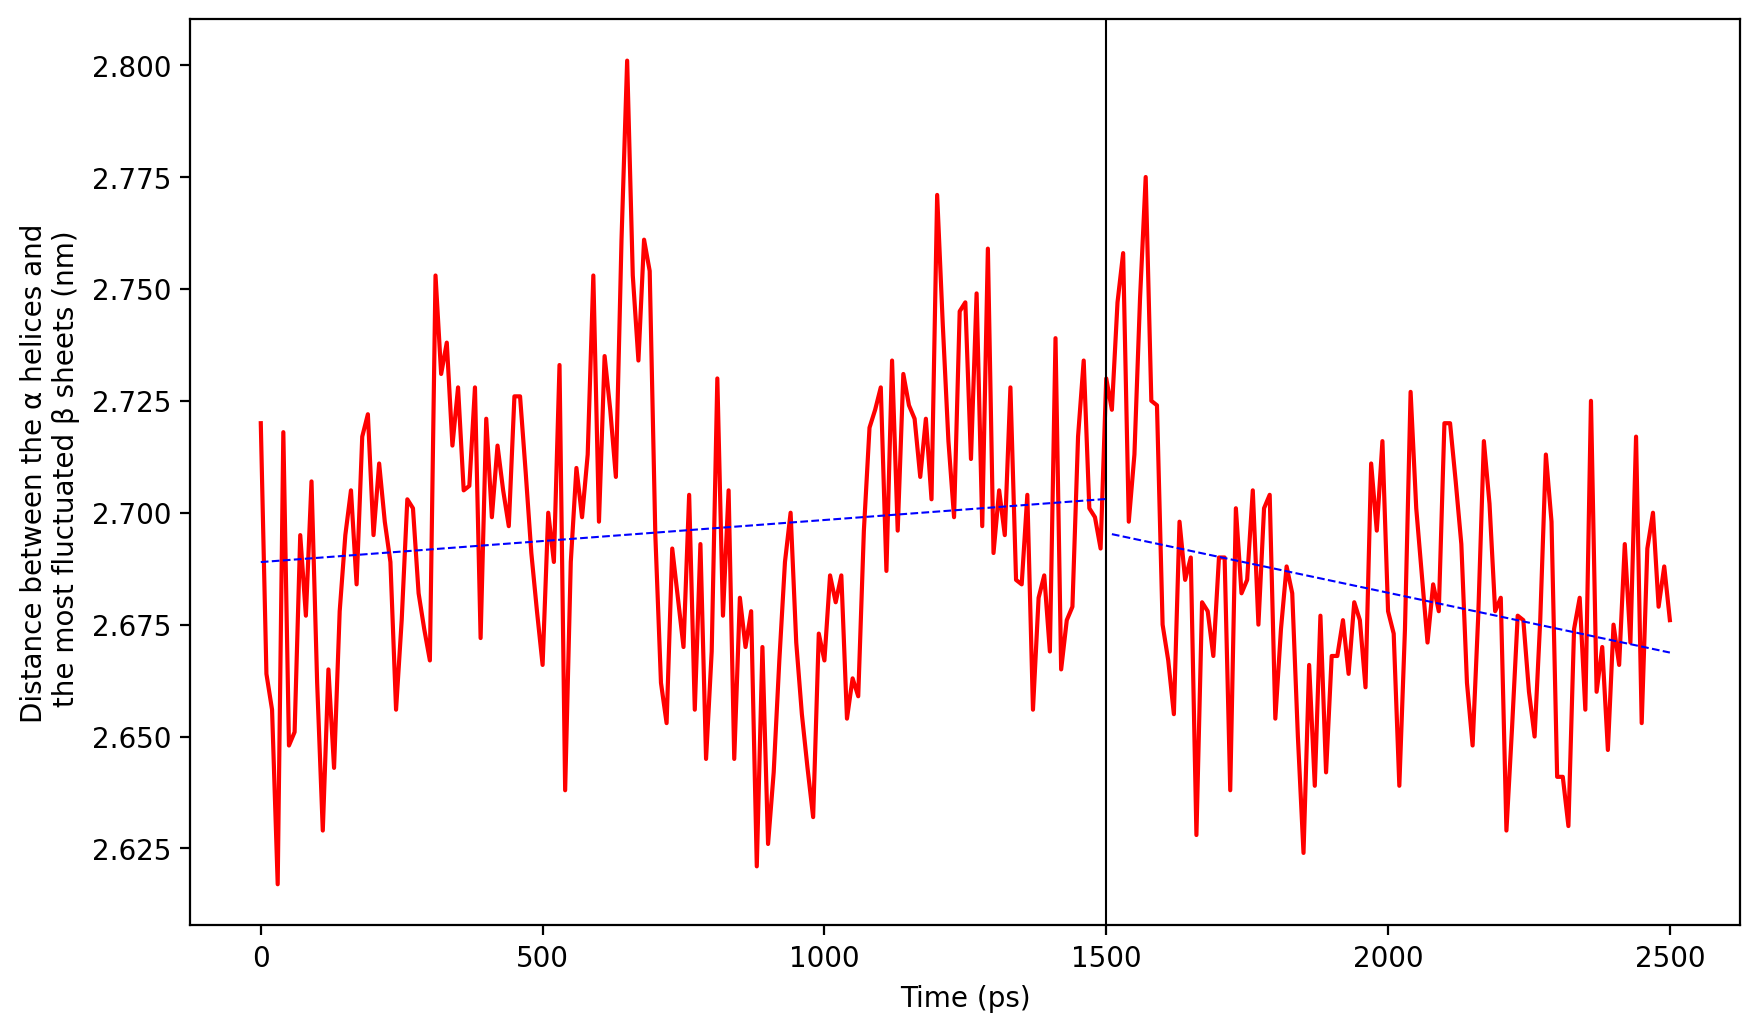

In [4]:
import numpy as np
import matplotlib.pyplot as plt

x,y = np.loadtxt("entrance_dist.xvg",comments=["@","#"],unpack=True)

new_y = list(y.copy())
for duplicate in [151 + (i*21) for i in range(5)]:
    new_y.pop(duplicate)
    
time = [i*10 for i in range(251)]

plt.figure(dpi=200,figsize=(10,6))
plt.plot(time,new_y,c="red")
plt.axvline(1500,c="black",ls="-",lw=0.75)
plt.xlabel("Time (ps)")
plt.ylabel("Distance between the α helices and\n the most fluctuated β sheets (nm)")

soln_time = [i*10 for i in range(151)]
z = np.polyfit(soln_time, new_y[:151], 1)
p = np.poly1d(z)
plt.plot(soln_time, p(soln_time),c="blue",ls="--",lw=0.75)

dehy_time = [i*10 for i in range(151,251)]
z = np.polyfit(dehy_time, new_y[151:251], 1)
p = np.poly1d(z)
plt.plot(dehy_time, p(dehy_time),c="blue",ls="--",lw=0.75);

# Python code to create a movie using .bmp images produced by VMD

In [ ]:
import cv2
import os

# Set the directory containing your BMP image files
image_folder = 'C:\\Users\\anira\\Downloads\\combined'

# Get the list of BMP image files in the specified directory
images = [img for img in os.listdir(image_folder) if img.endswith(".bmp")]
frame = cv2.imread(os.path.join(image_folder, images[0]))

# Set the output video file name and codec
output_file = '5xn9_combined.mp4'
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # You can change the codec as needed

# Set the frame size to match the dimensions of the BMP images
height, width, layers = frame.shape
frame_size = (width, height)

# Create the video writer object
out = cv2.VideoWriter(output_file, fourcc, 10, frame_size)  # Adjust the frame rate as needed 

# Loop through the BMP images and add them to the video
for image in images:
    img_path = os.path.join(image_folder, image)
    frame = cv2.imread(img_path)
    out.write(frame)

# Release the video writer object
out.release()

print(f"Video '{output_file}' created successfully!")